Linear ODE: $x' = Ax + u$, $x \in \mathbb{R}^n$

$\Phi = e^{A\delta}$

$$
X_{k+1} = \Phi X_k \oplus V,\qquad k \geq 1
$$

- $X_1 = \Phi X_0 \oplus V$
- $X_2 = \Phi^2 X_0 \oplus \Phi V \oplus V$
- $X_3 = \Phi^3 X_0 \oplus \Phi^2 V \oplus \Phi V \oplus V$

---

**Problem:** Given $X_3 \subset \mathbb{R}^n$, find $X_0$.

- $X_3 \ominus \Phi^2 V \ominus \Phi V \ominus V= \Phi^3 X_0$

- $\Phi^{-3}(X_3 \ominus \Phi^2 V \ominus \Phi V \ominus V) = X_0$

- $\Phi^{-3}X_3 \ominus \Phi^{-1} V \ominus \Phi^{-2} V \ominus \Phi^{-3} V = X_0$

In [1]:
using LazySets, Plots

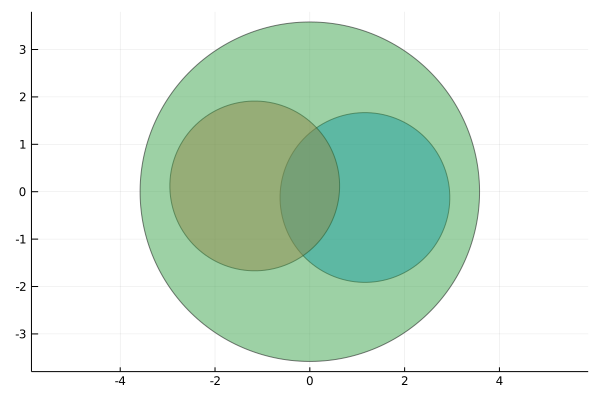

In [5]:
X = rand(Ball2)
plot(X, ratio=1)

X₋ = Ball2(-1 .* X.center, X.radius)
plot!(X₋)

plot!(X + X₋)

$$
Y = X \oplus V
$$
where $V$ and $Y$ are known

Find $X$:  $ X = Y \ominus V$

In [13]:
Xp = overapproximate(X, HPolygon, 1e-2)
Y = minkowski_difference(Xp, Xp)

vertices_list(Y)

1-element Array{Array{Float64,1},1}:
 [1.1319735795471057e-16, 5.690815480500228e-16]

In [6]:
?minkowski_difference

search: minkowski_difference



```
minkowski_difference(P::LazySet{N}, Q::LazySet{N}) where {N<:Real}
```

Concrete Minkowski difference (geometric difference) for a pair of convex sets.

### Input

  * `P` – polytopic set
  * `Q` – compact convex set that is subtracted from `P`

### Output

An `HPolytope` that corresponds to the Minkowski difference of `P` minus `Q` if `P` is bounded, and an `HPolyhedron` if `P` is unbounded.

### Notes

This function requires that the list of constraints of the set `P` is available and that the set `Q` is bounded.

### Algorithm

This function implements Theorem 2.3 in [1], which we state next.

Suppose $P$ is a polyhedron

$$
P = \{z ∈ ℝ^n: sᵢᵀz ≤ rᵢ,~i = 1, …, N\}.
$$

where $sᵢ ∈ ℝ^n, sᵢ ≠ 0$, and $rᵢ ∈ ℝ$. Assume $ρ(sᵢ,Q)$ is defined for $i = 1, …, N$. Then,

$$
P ⊖ Q = \{z ∈ ℝ^n: sᵢᵀz ≤ rᵢ - ρ(sᵢ,Q),~i = 1, …, N\}.
$$

where $⊖$ is defined as $P ⊖ Q = \{z ∈ ℝ^n: z + v ∈ P  ~∀~v ∈ Q\}$ and is called the *Minkowski difference* (also referenced as *Pontryagin difference*, or geometric difference). It is denoted in [1] as the operation `P ~ Q`.

[1] Ilya Kolmanovsky and Elmer G. Gilbert (1997). *Theory and computation of disturbance invariant sets for discrete-time linear systems.* [Mathematical Problems in Engineering Volume 4, Issue 4, Pages 317-367.](http://dx.doi.org/10.1155/S1024123X98000866)


In [14]:
using ReachabilityAnalysis, Plots

┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1278


In [20]:
@taylorize function rotating!(du, u, p, t)
    du[1] = u[2]
    du[2] = -u[1]
end

# A = [0. 1.0; -1 0]
# prob = @ivp(x' = Ax, x(0) ∈ BallInf(ones(2), 0.5))
prob = @ivp(x' = rotating!(x), dim: 2, x(0) ∈ BallInf(ones(2), 0.5))

sol_forward = solve(prob, tspan=(0.0, 5.0));
sol_backward = solve(prob, tspan=(5.0, 0.0));

solz_forward = overapproximate(sol_forward, Zonotope)
solz_backward = overapproximate(sol_backward, Zonotope);

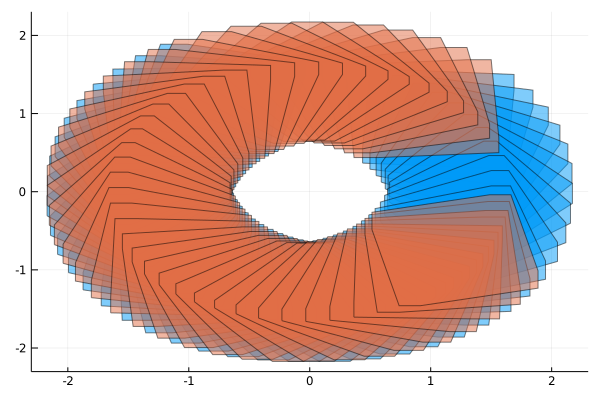

In [24]:
plot(solz_forward, vars=(1, 2))
plot!(solz_backward, vars=(1, 2))

---